In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("../Data/FatherSonHeights/pearson.tsv", sep = '\t')
df.columns = ["Father's Height (inches)", "Son's Height (inches)"]

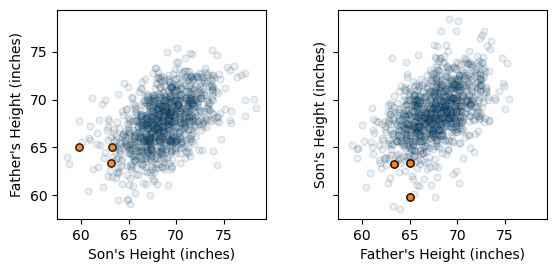

In [45]:
dad = df["Father's Height (inches)"].tail(-3)
son = df["Son's Height (inches)"].tail(-3)

dad1 = df["Father's Height (inches)"].head(3)
son1 = df["Son's Height (inches)"].head(3)


fig, axs = plt.subplots(1, 2, sharex = True, sharey = True, figsize = (6,2.8))

ax = axs[0]
ax.set_aspect(1)
ax.scatter(son, dad, alpha = .1, ec = 'black', s = 23)
ax.scatter(son1, dad1, alpha = .9,ec = 'black', s = 28, fc = 'C1')
ax.set_ylabel("Father's Height (inches)")
ax.set_xlabel("Son's Height (inches)")

ax = axs[1]
ax.set_aspect(1)
ax.scatter(dad, son, alpha = .1, ec = 'black', s = 23)
ax.scatter(dad1, son1, alpha = 1, ec = 'black', s = 28, fc = 'C1')

ax.set_xlabel("Father's Height (inches)")
ax.set_ylabel("Son's Height (inches)")

plt.tight_layout()
plt.savefig('../book/images/fathersonscatter.svg', transparent = True)

In [30]:
df

,Father's Height (inches),Son's Height (inches)
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3
...,...,...
1073,67.0,70.8
1074,71.3,68.3
1075,71.8,69.3
1076,70.7,69.3


In [47]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, PointDrawTool

# Display plot within a notebook
output_notebook()

# Sample data
data = {'x': [1, 2, 3, 4, 5], 'y': [2, 5, 8, 2, 7]}
data2 = {'x': [1.5, 2.5, 3.5], 'y': [2.5, 5.5, 7.5]}

# Create ColumnDataSource
source = ColumnDataSource(data)
source2 = ColumnDataSource(data2)

# Create a figure
p = figure(x_range=(0, 6), y_range=(0, 10), tools="")

# Add circle and rectangle glyphs
c1 = p.circle('x', 'y', source=source, size=20)
r1 = p.rect('x', 'y', width=0.1, height=0.1, source=source2)

# Add PointDrawTool to the figure
tool = PointDrawTool(renderers=[c1, r1])
p.add_tools(tool)
p.toolbar.active_tap = tool  # Activate the draw tool

# Show the plot
show(p)


Loading BokehJS ...

In [48]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, PointDrawTool, CustomJS, Div
from bokeh.layouts import column

# Display plot within a notebook
output_notebook()

# Sample data
data = {'x': [1, 2, 3, 4, 5], 'y': [2, 5, 8, 2, 7]}

# Create ColumnDataSource
source = ColumnDataSource(data)

# Create a figure
p = figure(x_range=(0, 6), y_range=(0, 10), tools="")

# Add circle glyph
c1 = p.circle('x', 'y', source=source, size=20, color="navy", alpha=0.5)

# Display for correlation
div = Div(text="Correlation coefficient: ?", width=200, height=30)

# CustomJS for updating the correlation coefficient dynamically
callback = CustomJS(args=dict(source=source, div=div), code="""
    const data = source.data;
    const x = data['x'];
    const y = data['y'];
    const n = x.length;

    let mean_x = 0;
    let mean_y = 0;
    for (let i = 0; i < n; i++) {
        mean_x += x[i];
        mean_y += y[i];
    }
    mean_x /= n;
    mean_y /= n;

    let num = 0;
    let den_x = 0;
    let den_y = 0;
    for (let i = 0; i < n; i++) {
        num += (x[i] - mean_x) * (y[i] - mean_y);
        den_x += (x[i] - mean_x) ** 2;
        den_y += (y[i] - mean_y) ** 2;
    }

    const corr = num / Math.sqrt(den_x * den_y);
    div.text = "Correlation coefficient: " + corr.toFixed(2);
""")

# Add PointDrawTool to the figure
tool = PointDrawTool(renderers=[c1], add=False)
p.add_tools(tool)
p.toolbar.active_tap = tool  # Activate the draw tool

# Attach the callback to the source
source.js_on_change('data', callback)

# Show the plot and the correlation coefficient
show(column(div, p))


Loading BokehJS ...